In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
%cd /content/drive/MyDrive/grand_final/amplitude/

/content/drive/MyDrive/grand_final/amplitude


In [17]:
import pandas as pd
heart_df = pd.read_csv('resp_features_extracted.csv')
resp_df = pd.read_csv('heart_features_extracted.csv')

In [ ]:
heart_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,label
89995,0.166352,0.603960,-0.753348,1.265178,2.018526,70.639251,-0.015166,-0.332842,0.701822,0.555556,4.191254,29
89996,0.166899,0.582504,-0.651843,1.236345,1.888188,66.089843,0.007441,-0.313563,0.669585,0.555556,4.071324,29
89997,0.169902,0.605162,-0.737066,1.272211,2.009278,71.115728,-0.012276,-0.327110,0.706568,0.555556,4.162523,29
89998,0.190000,0.747053,-1.006809,1.538053,2.544861,106.953988,-0.036665,-0.428875,0.863694,0.555556,4.283861,29
89999,0.168876,0.602064,-0.733864,1.268376,2.002239,70.380066,-0.010774,-0.325440,0.697824,0.555556,4.165094,29


In [ ]:
resp_df.head()

,0,1,2,3,4,5,6,7,8,9,10,label
0,-0.011069,0.121103,-0.330885,0.278482,0.609367,2.661913,-0.000212,-0.058613,0.041952,2.222222,4.507063,0
1,-0.010160,0.099299,-0.296711,0.235779,0.532491,1.793420,-0.002274,-0.035788,0.032380,2.777778,4.615405,0
2,-0.011006,0.105836,-0.319251,0.250142,0.569394,2.038021,-0.002276,-0.040578,0.036201,2.777778,4.627582,0
3,-0.010875,0.161753,-0.336793,0.313889,0.650682,4.730817,-0.003516,-0.124028,0.109195,2.222222,4.191937,0
4,-0.010932,0.125554,-0.329391,0.281837,0.611228,2.859008,-0.000934,-0.071778,0.055513,2.222222,4.470366,0


In [ ]:
# Separate features and labels (last column is label)
heart_features = heart_df.iloc[:, :-1]
heart_labels = heart_df.iloc[:, -1]

resp_features = resp_df.iloc[:, :-1]
resp_labels = resp_df.iloc[:, -1]

In [ ]:
import numpy as np

assert np.array_equal(heart_labels, resp_labels), "Label mismatch between heart and respiration!"
labels = heart_labels.values  # final label

In [ ]:
fused_features = pd.concat([heart_features, resp_features], axis=1)

In [ ]:
fused_features.head()

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
0,0.171907,0.782030,-1.230617,1.505896,2.736513,115.401996,-0.069793,-0.472317,0.902229,0.555556,...,0.121103,-0.330885,0.278482,0.609367,2.661913,-0.000212,-0.058613,0.041952,2.222222,4.507063
1,0.174393,0.921753,-1.460881,1.745011,3.205892,158.407546,-0.092664,-0.579307,1.040968,0.555556,...,0.099299,-0.296711,0.235779,0.532491,1.793420,-0.002274,-0.035788,0.032380,2.777778,4.615405
2,0.177521,0.948240,-1.502044,1.792993,3.295037,167.521172,-0.096678,-0.597262,1.063475,0.555556,...,0.105836,-0.319251,0.250142,0.569394,2.038021,-0.002276,-0.040578,0.036201,2.777778,4.627582
3,0.167052,0.524186,-0.709483,1.095414,1.804897,54.481984,-0.021078,-0.271762,0.653895,0.555556,...,0.161753,-0.336793,0.313889,0.650682,4.730817,-0.003516,-0.124028,0.109195,2.222222,4.191937
4,0.166651,0.704814,-1.116918,1.370675,2.487593,94.416329,-0.052547,-0.415658,0.831685,0.555556,...,0.125554,-0.329391,0.281837,0.611228,2.859008,-0.000934,-0.071778,0.055513,2.222222,4.470366


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    fused_features, labels, test_size=0.2, stratify=labels, random_state=42
)

In [ ]:
X_train.shape

(72000, 22)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build and train model
model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors as needed
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8822777777777778

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       0.20      0.21      0.21       600
           6       1.00      1.00      1.00       600
           7       0.19      0.18      0.19       600
           8       0.22      0.24      0.23       600
           9       1.00      0.99      1.00       600
          10       0.95      0.96      0.96       600
          11       0.19      0.18      0.18       600
          12       0.98      0.99      0.99       600
          13       0.99      0.98      0.99       600
          14       0.98      0.97      0.97       600
          15       0.97      0.94      0.95       600
          16       0.98    

# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8764444444444445

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       0.10      0.10      0.10       600
           6       1.00      1.00      1.00       600
           7       0.10      0.10      0.10       600
           8       0.08      0.08      0.08       600
           9       1.00      1.00      1.00       600
          10       0.99      0.99      0.99       600
          11       0.08      0.08      0.08       600
          12       0.99      1.00      0.99       600
          13       1.00      0.99      1.00       600
          14       0.99      0.99      0.99       600
          15       1.00      1.00      1.00       600
          16       1.00    

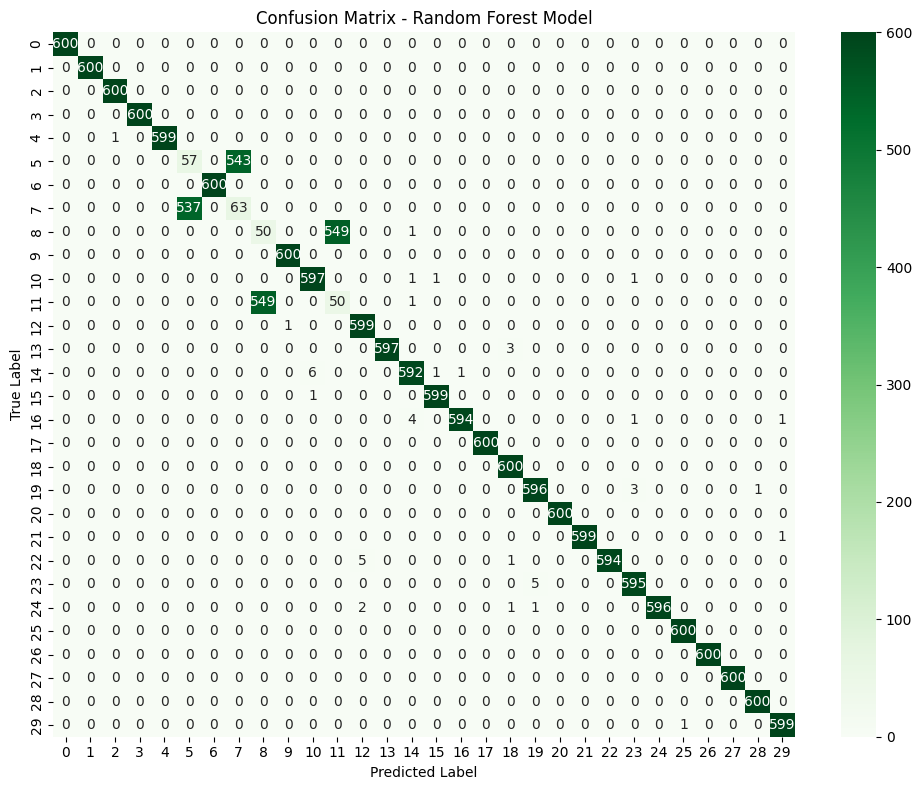

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.tight_layout()
plt.show()


# **SVM**

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [19]:
# STEP 2: Split features and labels
heart_features = heart_df.iloc[:, :-1]
resp_features = resp_df.iloc[:, :-1]
heart_labels = heart_df.iloc[:, -1]
resp_labels = resp_df.iloc[:, -1]

In [20]:
# STEP 3: Validate labels match
assert np.array_equal(heart_labels.values, resp_labels.values), "Labels do not match!"
labels = heart_labels.values

In [21]:
# STEP 4: Early fusion of features
fused_features = pd.concat([heart_features, resp_features], axis=1)

In [22]:
# STEP 5: Normalize features (important for SVM)
scaler = StandardScaler()
fused_scaled = scaler.fit_transform(fused_features)

In [23]:
# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    fused_scaled, labels, test_size=0.2, stratify=labels, random_state=42
)

In [24]:
# STEP 7: Train SVM (use RBF kernel for non-linear data)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [25]:
# STEP 8: Evaluate
y_pred = svm_model.predict(X_test)

print("✅ SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ SVM Accuracy: 0.9268888888888889

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       0.45      0.20      0.28       600
           6       1.00      1.00      1.00       600
           7       0.49      0.75      0.59       600
           8       0.47      0.37      0.41       600
           9       1.00      1.00      1.00       600
          10       0.97      0.99      0.98       600
          11       0.48      0.57      0.52       600
          12       0.99      1.00      1.00       600
          13       1.00      1.00      1.00       600
          14       0.99      0.97      0.98       600
          15       1.00      1.00      1.00       600
          16       

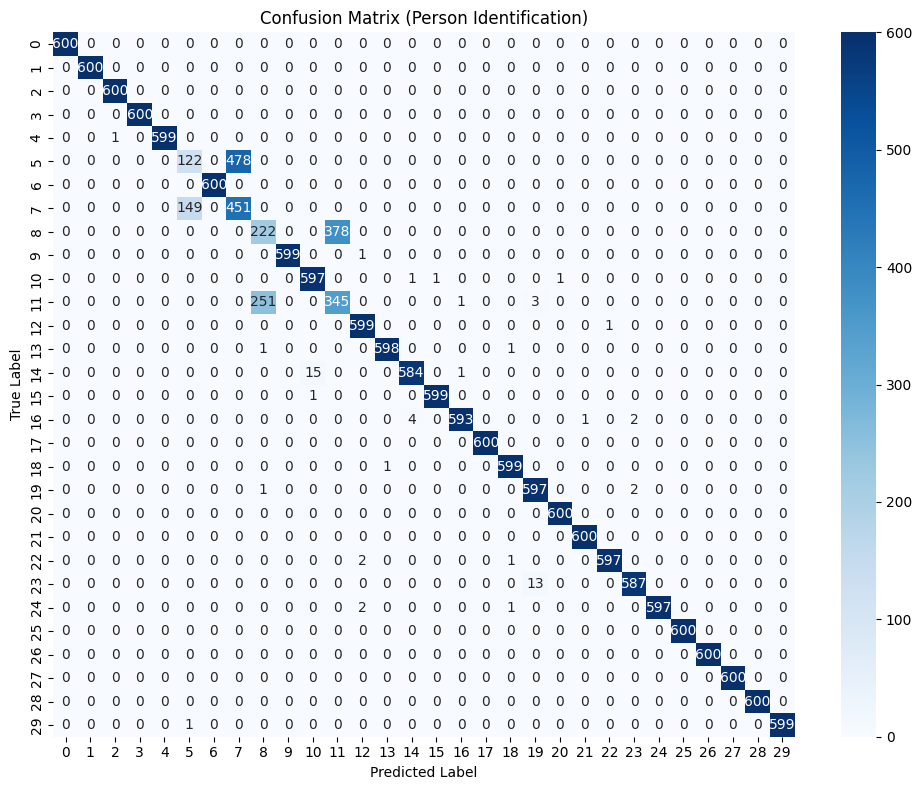

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Person Identification)")
plt.tight_layout()
plt.show()

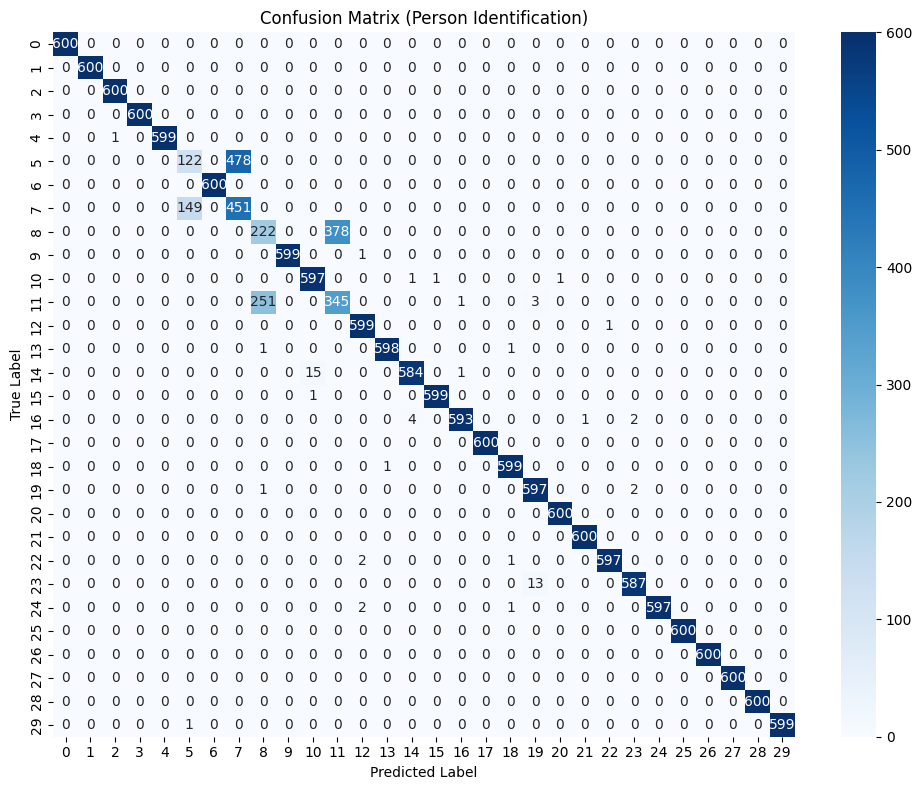

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Person Identification)")
plt.tight_layout()
plt.show()


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("📊 Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       0.44      0.38      0.41       600
           6       1.00      1.00      1.00       600
           7       0.46      0.52      0.49       600
           8       0.45      0.43      0.44       600
           9       1.00      1.00      1.00       600
          10       0.96      0.96      0.96       600
          11       0.45      0.46      0.45       600
          12       0.99      1.00      1.00       600
          13       0.99      0.98      0.99       600
          14       0.97      0.97      0.97       600
          15       0.99      0.97      0.98       600
          16       0.99      0.98      0.98       60

# **Weighter Fusion**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Extract features and labels
heart_features = heart_df.iloc[:, :-1].values
resp_features = resp_df.iloc[:, :-1].values
labels = heart_df.iloc[:, -1].values  # Person IDs (integers)


In [ ]:
# Scale features independently
scaler = StandardScaler()
heart_scaled = scaler.fit_transform(heart_features)
resp_scaled = scaler.fit_transform(resp_features)

# Apply weighted fusion
alpha = 0.6  # weight for heart signal (can tune this)
X_fused = alpha * heart_scaled + (1 - alpha) * resp_scaled  # Shape: (45000, 11)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fused, labels, test_size=0.2, stratify=labels, random_state=42
)


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("📊 KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


📊 KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       0.20      0.21      0.21       600
           6       1.00      1.00      1.00       600
           7       0.19      0.18      0.19       600
           8       0.22      0.24      0.23       600
           9       1.00      0.99      1.00       600
          10       0.95      0.96      0.96       600
          11       0.19      0.18      0.18       600
          12       0.98      0.99      0.99       600
          13       0.99      0.98      0.99       600
          14       0.98      0.97      0.97       600
          15       0.97      0.94      0.95       600
          16       0.98      0.97      0.98       60

# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       0.10      0.10      0.10       600
           6       1.00      1.00      1.00       600
           7       0.10      0.10      0.10       600
           8       0.07      0.07      0.07       600
           9       1.00      1.00      1.00       600
          10       0.96      0.96      0.96       600
          11       0.08      0.09      0.08       600
          12       0.98      1.00      0.99       600
          13       0.99      0.98      0.98       600
          14       0.98      0.98      0.98       600
          15       0.96      0.95      0.96       600
          16       0.99      0.98      0.9

# **SVM**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma='scale')  # You can tune C and kernel
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("📊 SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


📊 SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       0.43      0.21      0.29       600
           6       1.00      1.00      1.00       600
           7       0.48      0.71      0.57       600
           8       0.45      0.37      0.41       600
           9       1.00      0.99      1.00       600
          10       0.96      0.99      0.98       600
          11       0.47      0.54      0.50       600
          12       1.00      1.00      1.00       600
          13       1.00      0.99      1.00       600
          14       0.99      0.98      0.98       600
          15       0.99      0.98      0.99       600
          16       0.99      0.98      0.99       60

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create and train model
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Report
print("📊 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       0.99      0.99      0.99       600
           5       0.44      0.32      0.37       600
           6       1.00      1.00      1.00       600
           7       0.47      0.58      0.52       600
           8       0.43      0.37      0.40       600
           9       1.00      0.99      0.99       600
          10       0.90      0.85      0.87       600
          11       0.45      0.48      0.46       600
          12       0.96      0.99      0.97       600
          13       0.98      0.93      0.95       600
          14       0.92      0.95      0.93       600
          15       0.93      0.93      0.93       600
          16       0.95      0.97   

# **Late fusion **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

heart_X = heart_df.iloc[:, :-1].values
resp_X = resp_df.iloc[:, :-1].values
labels = heart_df.iloc[:, -1].values  # Integer labels

# Scale separately
scaler = StandardScaler()
heart_scaled = scaler.fit_transform(heart_X)
resp_scaled = scaler.fit_transform(resp_X)

# Split (same seed for same rows)
X_train_h, X_test_h, y_train, y_test = train_test_split(
    heart_scaled, labels, test_size=0.2, stratify=labels, random_state=42
)
X_train_r, X_test_r, _, _ = train_test_split(
    resp_scaled, labels, test_size=0.2, stratify=labels, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_heart = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resp = RandomForestClassifier(n_estimators=100, random_state=42)

rf_heart.fit(X_train_h, y_train)
rf_resp.fit(X_train_r, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.svm import SVC

svm_heart = SVC(kernel='rbf', probability=True, random_state=42)
svm_resp = SVC(kernel='rbf', probability=True, random_state=42)

svm_heart.fit(X_train_h, y_train)
svm_resp.fit(X_train_r, y_train)


SVC(probability=True, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_heart = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_resp = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

lr_heart.fit(X_train_h, y_train)
lr_resp.fit(X_train_r, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
rf_proba_h = rf_heart.predict_proba(X_test_h)
rf_proba_r = rf_resp.predict_proba(X_test_r)

rf_fused = (rf_proba_h + rf_proba_r) / 2
rf_pred = np.argmax(rf_fused, axis=1)


In [ ]:
svm_proba_h = svm_heart.predict_proba(X_test_h)
svm_proba_r = svm_resp.predict_proba(X_test_r)

svm_fused = (svm_proba_h + svm_proba_r) / 2
svm_pred = np.argmax(svm_fused, axis=1)


In [ ]:
lr_proba_h = lr_heart.predict_proba(X_test_h)
lr_proba_r = lr_resp.predict_proba(X_test_r)

lr_fused = (lr_proba_h + lr_proba_r) / 2
lr_pred = np.argmax(lr_fused, axis=1)


📊 Random Forest Late Fusion Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       0.11      0.11      0.11       600
           6       0.99      1.00      0.99       600
           7       0.09      0.09      0.09       600
           8       0.06      0.06      0.06       600
           9       1.00      1.00      1.00       600
          10       0.97      0.98      0.98       600
          11       0.09      0.09      0.09       600
          12       0.98      0.99      0.99       600
          13       0.98      0.96      0.97       600
          14       0.99      0.98      0.99       600
          15       0.98      0.97      0.98       600
          16       1.00      0

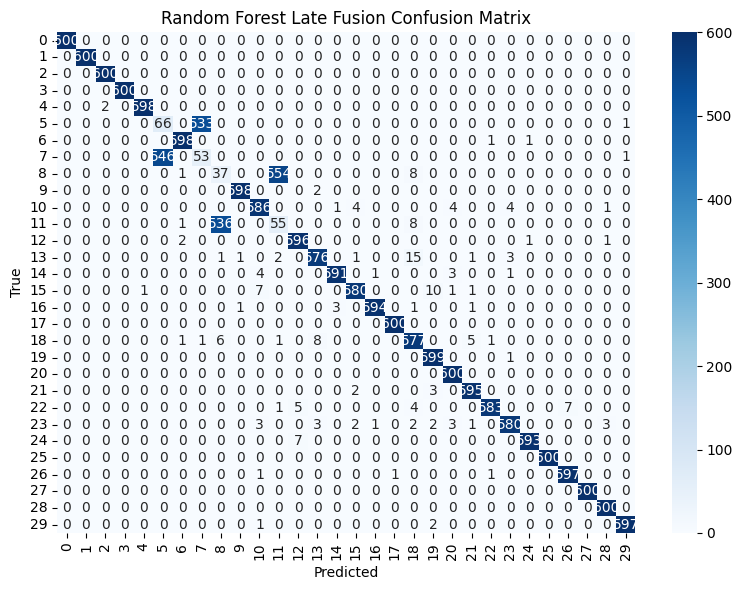

📊 SVM Late Fusion Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       0.99      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       0.99      1.00      1.00       600
           5       0.53      0.54      0.53       600
           6       0.97      0.99      0.98       600
           7       0.53      0.50      0.52       600
           8       0.52      0.61      0.56       600
           9       1.00      1.00      1.00       600
          10       0.94      0.95      0.94       600
          11       0.55      0.32      0.40       600
          12       0.99      0.99      0.99       600
          13       0.96      0.97      0.96       600
          14       0.98      0.98      0.98       600
          15       0.96      0.92      0.94       600
          16       0.90      0.97      0

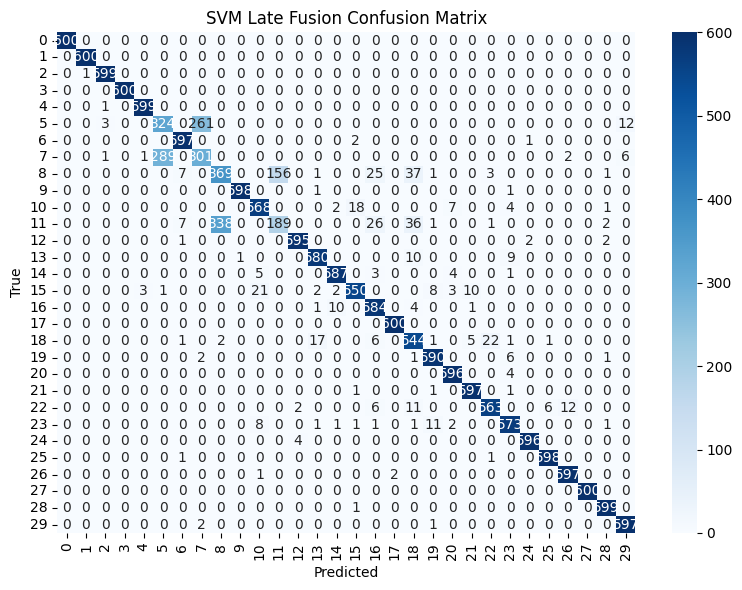

📊 Logistic Regression Late Fusion Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       600
           1       0.99      1.00      1.00       600
           2       0.99      0.99      0.99       600
           3       1.00      1.00      1.00       600
           4       0.98      0.99      0.99       600
           5       0.45      0.35      0.39       600
           6       0.97      0.96      0.96       600
           7       0.46      0.54      0.50       600
           8       0.45      0.37      0.41       600
           9       0.99      1.00      0.99       600
          10       0.93      0.87      0.90       600
          11       0.46      0.44      0.45       600
          12       0.97      0.98      0.98       600
          13       0.91      0.94      0.92       600
          14       0.89      0.94      0.92       600
          15       0.93      0.90      0.91       600
          16       0.85 

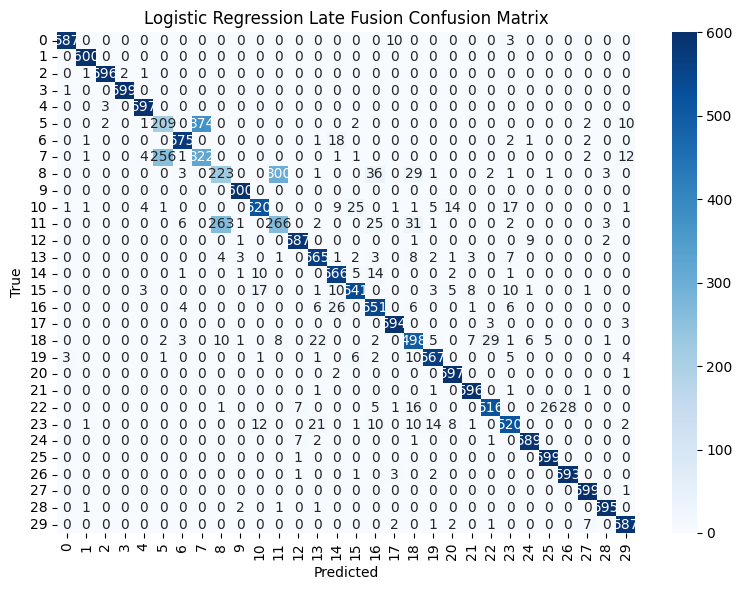

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_fusion(y_true, y_pred, title):
    print(f"📊 {title} Classification Report:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

evaluate_fusion(y_test, rf_pred, "Random Forest Late Fusion")
evaluate_fusion(y_test, svm_pred, "SVM Late Fusion")
evaluate_fusion(y_test, lr_pred, "Logistic Regression Late Fusion")


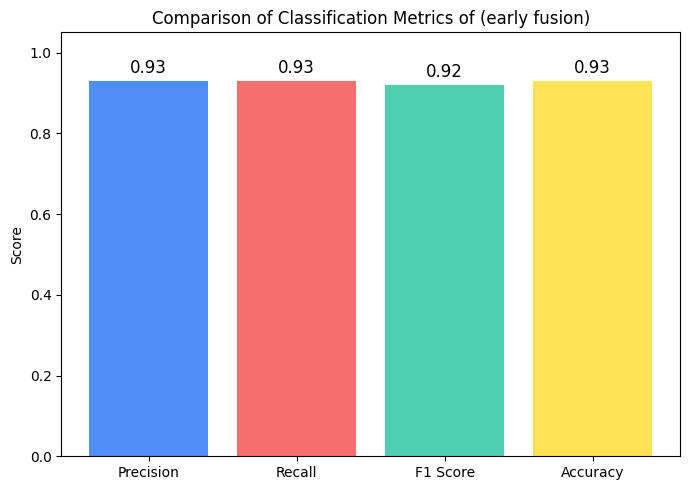

In [14]:
import matplotlib.pyplot as plt

# Metric names and corresponding values
metrics = ["Precision", "Recall", "F1 Score", "Accuracy"]
values = [0.93, 0.93, 0.92, 0.93]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['#4F8EF7', '#F76E6E', '#4FCFAF', '#FFE156'])

# Annotate each bar with the metric value
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.01, f"{value:.2f}",
             ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Comparison of Classification Metrics of (early fusion)")
plt.grid(axis='y', linestyle='', alpha=0.6)
plt.tight_layout()
plt.show()
